# Diseño y entrenamiento de un modelo MLP

Grupo: 1

Estudiantes:

-Constanza Olivos Fernandez

-Javier Nanco Becerra

-Nicolás Pozo Villagrán

Fecha: 20-09-2025

Version: 1.4

# Objetivos del notebook

En este notebook se realiza el diseño, entrenamiento y evaluación de un modelo de red neuronal de perceptrón multicapa (MLP) aplicado a la predicción del rendimiento de cultivos de trigo. Se utiliza un dataset preprocesado que incluye variables climáticas, de suelo y de manejo agrícola, con codificación de variables categóricas y escalado de características.

El flujo del notebook incluye la creación de la arquitectura MLP optimizada, la validación cruzada para evaluar la capacidad de generalización del modelo, y el entrenamiento final utilizando EarlyStopping para evitar sobreajuste. Se generan curvas de entrenamiento que permiten analizar la evolución del error durante el entrenamiento, así como gráficos de residuos para evaluar la distribución de los errores y detectar posibles sesgos.

Finalmente, se calculan métricas de desempeño relevantes para regresión (R², RMSE, MAE y MAPE) y se guardan tanto el modelo entrenado como las métricas y gráficos asociados. El objetivo principal es contar con un modelo robusto y confiable capaz de predecir el rendimiento de los cultivos, comprendiendo el comportamiento de los errores y la estabilidad de las predicciones en todo el rango de valores.

# Modelo MLP

En este bloque de código se implementa el entrenamiento, evaluación y análisis de un modelo de red neuronal de perceptrón multicapa (MLP) para predecir el rendimiento de cultivos de trigo. Se comienza cargando y preprocesando el dataset, aplicando codificación one-hot a las variables categóricas y escalado estándar a las características numéricas.

Se define la arquitectura del MLP, que incluye capas densas con activación ReLU y capas de Dropout para regularización, y se evalúa mediante validación cruzada para estimar su desempeño de manera robusta. Posteriormente, se entrena el modelo final utilizando EarlyStopping para prevenir sobreajuste y se generan curvas de entrenamiento que muestran la evolución del error durante las épocas.

Finalmente, se calculan métricas de desempeño (R², RMSE, MAE, MAPE), se analiza la distribución de los residuos y se guardan tanto el modelo entrenado como los resultados y gráficos correspondientes, permitiendo un análisis completo del comportamiento predictivo del MLP.

In [ ]:
!pip install tensorflow
!pip install scikeras
!pip install shap

✅ Dataset 'features_trigo.csv' cargado desde la carpeta 'csv'.
📊 Validación cruzada R² por fold: [0.75007878 0.72222062 0.71570214 0.73103827 0.72626144]
R² promedio CV: 0.7290602508096281
Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11212122.0000 - mse: 11212122.0000 - val_loss: 1033421.6250 - val_mse: 1033421.6250
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 893644.3125 - mse: 893644.3125 - val_loss: 409796.4688 - val_mse: 409796.4688
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - loss: 642279.9375 - mse: 642279.9375 - val_loss: 301515.0938 - val_mse: 301515.0938
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 554405.6875 - mse: 554405.6875 - val_loss: 242622.8281 - val_mse: 242622.8281
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 508431.5000 - mse: 508431.5000 - val_loss: 216526.8594 - val_mse: 216526.8594
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 481697.7812 - mse: 481697.7812 - val_loss: 

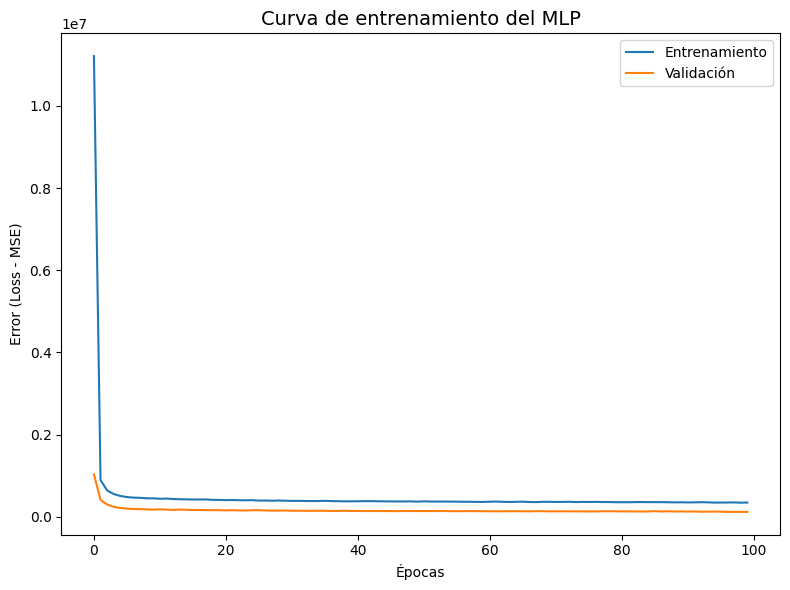

📉 Gráfico de curva de entrenamiento guardado como 'curva_entrenamiento_MLP.png'
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
Evaluación final en test:
R²: 0.7787, RMSE: 348.19, MAE: 273.53, MAPE: 5.55%
✅ Resultados guardados en 'resultados_mlp.csv'


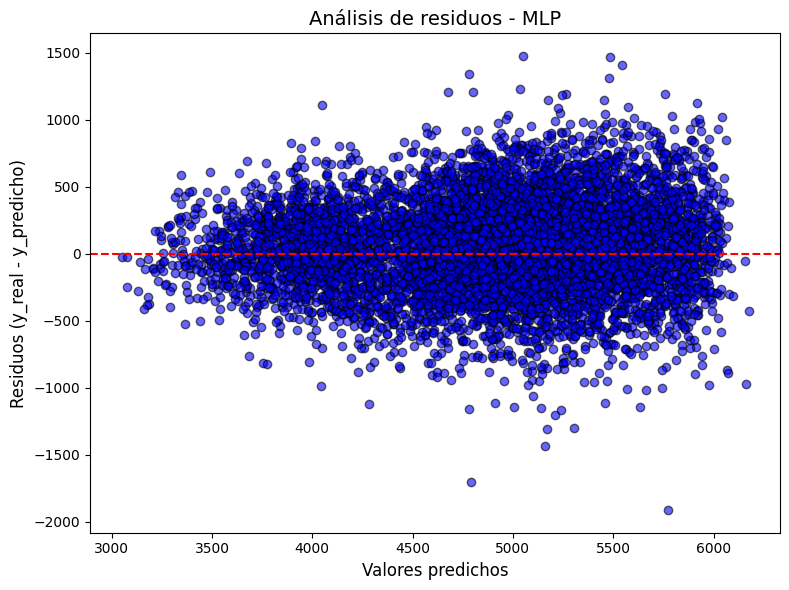

📊 Gráfico de residuos del MLP generado y guardado como 'residuos_MLP.png'
✅ Modelo final guardado como 'MLP_final_model.h5'


D:\Trabajo\Trabajos Universitarios\Semestre_10\EFE_Inteligencia_Artificial\Lab_1_Magna\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 7501it [04:05, 29.91it/s]                                                              
C:\Users\javie\AppData\Local\Temp\ipykernel_27432\1060287631.py:162: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=True)


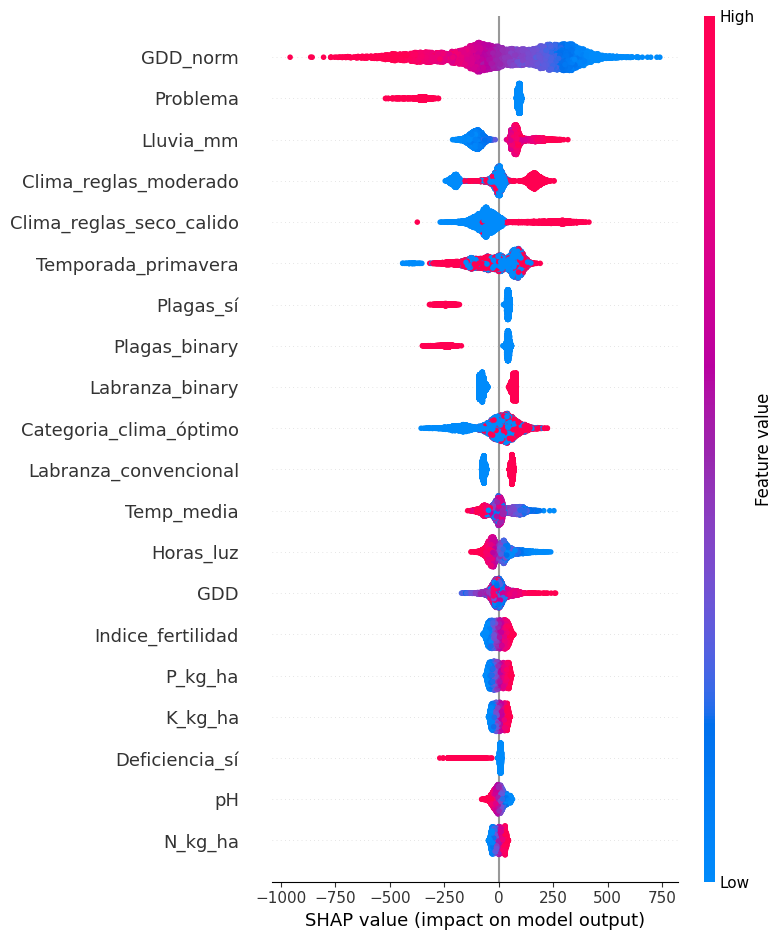

📊 Gráfico de importancia SHAP guardado como 'shap_importance.png'
✅ Ranking de importancia de features guardado en 'feature_importance_shap.csv'


<Figure size 640x480 with 0 Axes>

In [1]:
# ===========================
# Entrenamiento, evaluación y análisis de residuos del MLP (optimizado)
# ===========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
import os

# ===========================
# 1. Cargar dataset desde la carpeta 'csv'
# ===========================
csv_path = os.path.join('csv', 'features_trigo.csv')
df = pd.read_csv(csv_path)

print("✅ Dataset 'features_trigo.csv' cargado desde la carpeta 'csv'.")


# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Features y target
X = df_encoded.drop("Rendimiento_kg_ha", axis=1)
y = df_encoded["Rendimiento_kg_ha"]

# Split 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# ===========================
# 2. Función para crear modelo MLP
# ===========================
def crear_mlp():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# ===========================
# 3. Validación cruzada (sin EarlyStopping)
# ===========================
mlp_sklearn = KerasRegressor(
    model=crear_mlp, 
    epochs=50,  # fijo para CV
    batch_size=64,
    verbose=0
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp_sklearn, X_train_scaled, y_train, cv=kf, scoring='r2')

print("📊 Validación cruzada R² por fold:", scores)
print("R² promedio CV:", scores.mean())

# ===========================
# 4. Entrenamiento final con EarlyStopping
# ===========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_model = crear_mlp()
history = final_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_valid_scaled, y_valid),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ===========================
# 5. Curva de entrenamiento
# ===========================
plt.figure(figsize=(8,6))
plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Error (Loss - MSE)")
plt.title("Curva de entrenamiento del MLP", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("curva_entrenamiento_MLP.png", dpi=300)
plt.show()

print("📉 Gráfico de curva de entrenamiento guardado como 'curva_entrenamiento_MLP.png'")

# ===========================
# 6. Evaluación en test
# ===========================
y_pred = final_model.predict(X_test_scaled).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Evaluación final en test:\nR²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")

# ===========================
# 7. Guardar métricas
# ===========================
resultados_mlp = pd.DataFrame([{
    "Modelo": "MLP",
    "R²": r2,
    "R²_CV": scores.mean(),
    "RMSE": rmse,
    "MAE": mae,
    "MAPE (%)": mape
}])

resultados_mlp.to_csv("csv/resultados_mlp.csv", index=False)
print("✅ Resultados guardados en 'resultados_mlp.csv'")

# ===========================
# 8. Análisis de residuos
# ===========================
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.6, color="blue", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Análisis de residuos - MLP", fontsize=14)
plt.xlabel("Valores predichos", fontsize=12)
plt.ylabel("Residuos (y_real - y_predicho)", fontsize=12)
plt.tight_layout()
plt.savefig("images/residuos_MLP.png", dpi=300)
plt.show()
print("📊 Gráfico de residuos del MLP generado y guardado como 'residuos_MLP.png'")

# Guardar modelo final
final_model.save("modelos/MLP_final_model.h5")
print("✅ Modelo final guardado como 'MLP_final_model.h5'")

# ===========================================
# 9. Importancia de variables con SHAP
# ===========================================
import shap

# Crear explainer de SHAP para MLP
explainer = shap.Explainer(final_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Gráfico de summary (importancia global de features)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=True)
plt.tight_layout()
plt.savefig("images/shap_importance.png", dpi=300)
print("📊 Gráfico de importancia SHAP guardado como 'shap_importance.png'")

# Ranking de features por importancia media absoluta
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Importance", ascending=False)

# Guardar ranking en CSV
feature_importance.to_csv("csv/feature_importance_shap.csv", index=False)
print("✅ Ranking de importancia de features guardado en 'feature_importance_shap.csv'")



Los gráficos de residuos permiten evaluar la precisión y posibles sesgos del modelo de Red Neuronal Multicapa (MLP) empleado para predecir el rendimiento del trigo. Durante el entrenamiento, el modelo alcanzó una pérdida (MSE) en el conjunto de entrenamiento de aproximadamente 393.551, mientras que en el conjunto de validación el MSE final fue de 136.121, lo que indica que el modelo logró aprender la relación entre las variables sin sobreajustarse significativamente.

En el análisis de residuos, se observa un patrón de heterocedasticidad: la dispersión de los residuos aumenta a medida que los valores predichos crecen, mostrando que la precisión del MLP disminuye para rendimientos más altos. No obstante, en el rango medio de los valores predichos, el modelo captura adecuadamente la relación entre variables, evidenciado por la concentración de puntos cercana a la línea de residuos cero.

Comparado con otros modelos complejos como XGBoost, LightGBM y CatBoost, el MLP muestra un comportamiento similar respecto a heterocedasticidad, pero mantiene una ventaja en el rango central de predicciones. En conjunto, aunque el MLP logra un buen ajuste en valores medios, su precisión disminuye en los extremos, sugiriendo que modelos como Random Forest y KNN presentan un comportamiento más deseable, con residuos homogéneos y errores consistentes a lo largo de todo el rango de predicciones.

# Análisis SHAP - Modelo MLP (Multilayer Perceptron)

## Gráfico de Importancia de Variables

### Descripción del Gráfico
Este es un **SHAP summary plot** para el modelo MLP (red neuronal), que muestra la importancia y el impacto direccional de las variables en las predicciones del modelo.

### Ranking de Importancia de Variables

**Top 3 Variables Más Influyentes:**
1. **GDD_norm** - Variable con mayor impacto (Grados Día de Crecimiento normalizados)
2. **Problema** - Segunda en importancia
3. **Lluvia_mm** - Tercer lugar

**Variables de Importancia Media:**
- Clima_reglas_moderado
- Clima_reglas_seco_calido
- Temporada_primavera
- Plagas_si
- Plagas_binary

**Variables Menos Influyentes:**
- Labranza_binary
- Categoria_clima_óptimo
- Labranza_convencional
- Variables de suelo y nutrientes (pH, N_kg_ha, etc.)

### Diferencias Notables con Modelos Anteriores

#### Cambios Significativos:
- **GDD_norm** asciende a posición #1 (vs #2-3 en otros modelos)
- **Problema** desciende a posición #2 (era #1 consistentemente)
- **Lluvia_mm** mantiene posición alta (#3)
- Variables climáticas específicas ganan importancia

#### Variables que Pierden Relevancia:
- Labranza_binary (#3 en otros → posición media-baja)
- Temp_media (fuera del top 5)

### Interpretación de Patrones

#### Dominio Climático Acentuado:
- **GDD_norm** como variable más importante
- **Clima_reglas_moderado** y **Clima_reglas_seco_calido** con alta relevancia
- **Lluvia_mm** mantiene importancia crítica

#### Variables de Plagas:
- **Plagas_si** y **Plagas_binary** con impacto moderado-alto
- Posicionadas en el grupo de variables importantes

#### Variables de Manejo Agrícola:
- **Labranza** en general pierde importancia relativa
- **Temporada_primavera** con impacto moderado

### Hallazgos Clave del Modelo MLP

1. **Mayor énfasis en variables climáticas normalizadas** (GDD_norm)
2. **Problema mantiene alta importancia** pero no es la #1
3. **El MLP captura relaciones no lineales** complejas entre variables climáticas
4. **Patrón diferente** a los modelos basados en árboles

### Comparativa con Modelos Previos

**Consistencias:**
- Variables climáticas siguen siendo críticas
- Problema entre las top 3 en todos los modelos

**Diferencias MLP:**
- GDD_norm como variable más importante
- Mayor sensibilidad a variables climáticas específicas
- Menor importancia relativa de variables de manejo

### Conclusiones Específicas

- El MLP identifica **GDD_norm** como el factor más determinante
- Confirma la **criticalidad del clima** en las predicciones
- Muestra un **patrón distintivo** respecto a modelos basados en árboles
- Sugiere que las **relaciones climáticas normalizadas** son clave

### Recomendaciones
- Validar la superioridad de GDD_norm sobre GDD simple
- Investigar las relaciones no lineales que captura el MLP
- Considerar el MLP para modelar interacciones climáticas complejas